# 機械学習　効果測定　分類(決定木)
#### ●選択データ：digits.csv
#### ●分類で選択したモデル：決定木
#### ●決定木を選択した理由：  
　　散布図にて外れ値を確認し、明確な外れ値を検出できなかったため、外れ値の影響を受けにくい決定木をモデルに選択した

#### ●以下、【考察】にて検討した内容を記載する

### ◆CSVファイルの読み込みと表示

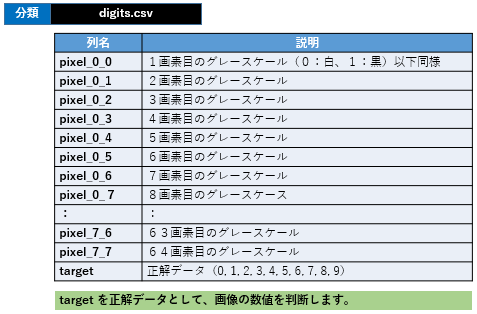

In [21]:
# pandasをインポートして別名をpdとする
# 実装
import pandas as pd

# アップロードしたCSVファイルを読み込んでデータフレームを生成する
# 行数・列数を確認する
df = pd.read_csv('digits.csv', encoding = 'UTF-8')
print(df.shape)

(1797, 66)


In [22]:
# データフレームの先頭5行を表示する
df.head()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,0,5,13,9,1,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,1,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,2,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,3,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
4,4,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### ◆正解データの確認
####   正解データは「target」列である。

In [23]:
# target列の値の種類を表示
print(df['target'].unique())


[0 1 2 3 4 5 6 7 8 9]


In [24]:
# target列の値のデータの出現回数を表示
print(df['target'].value_counts())

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64


### ◆正解データとそれ以外のデータの関連を俯瞰する


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


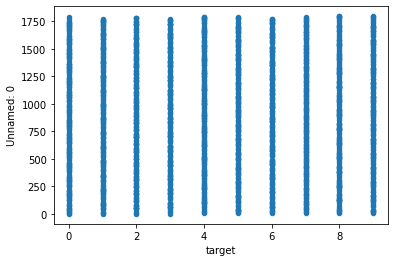

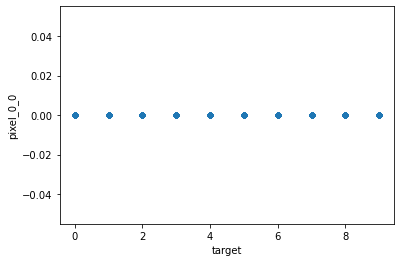

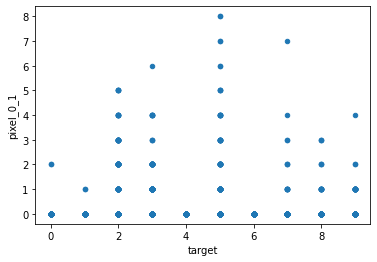

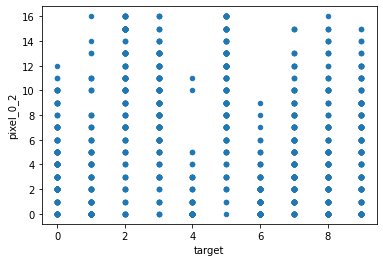

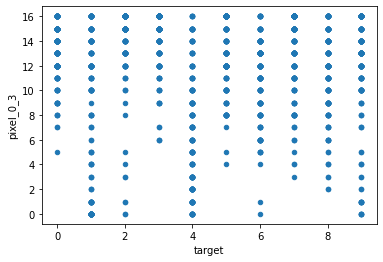

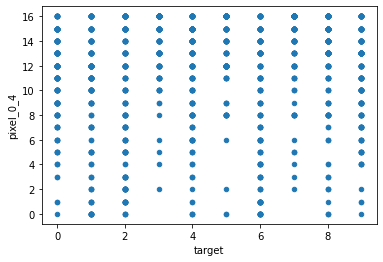

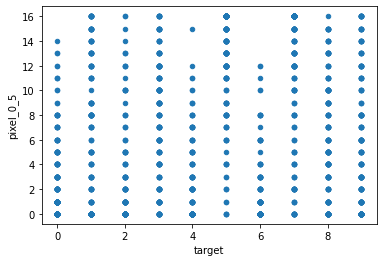

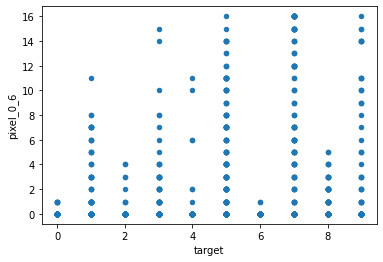

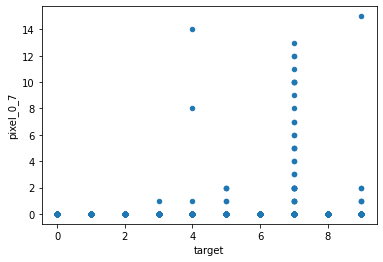

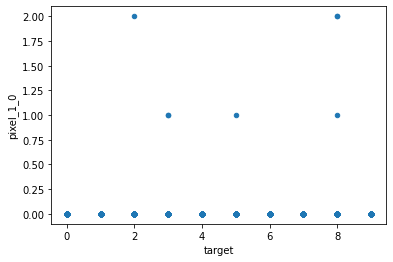

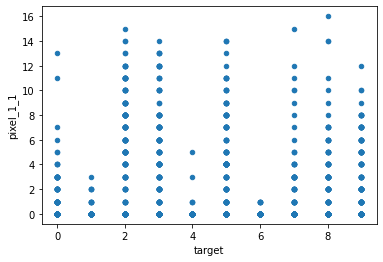

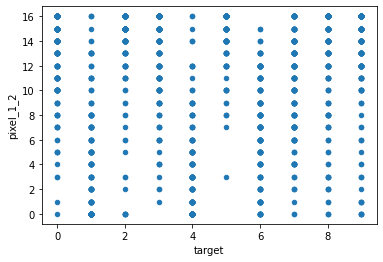

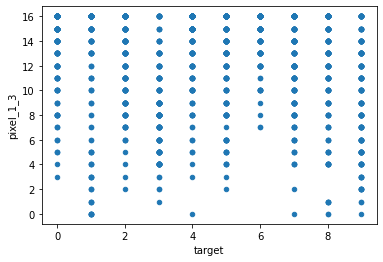

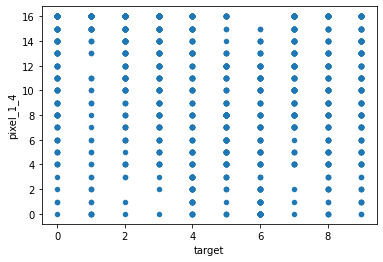

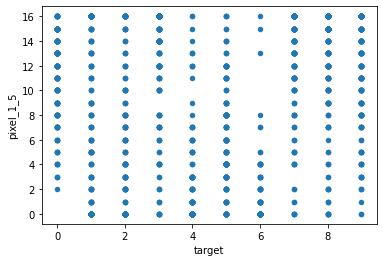

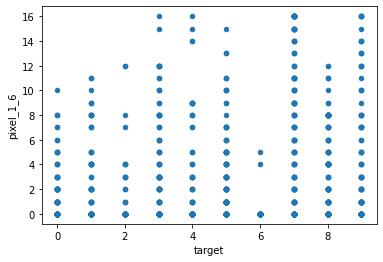

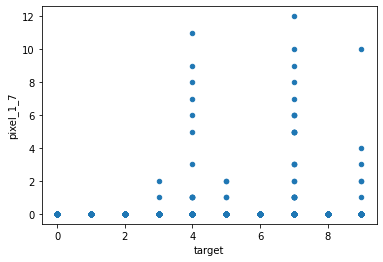

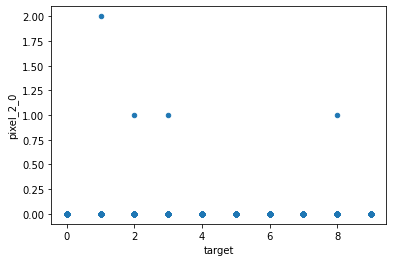

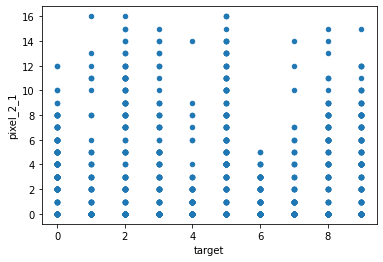

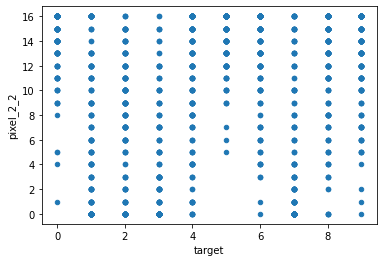

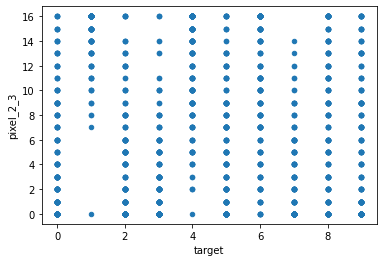

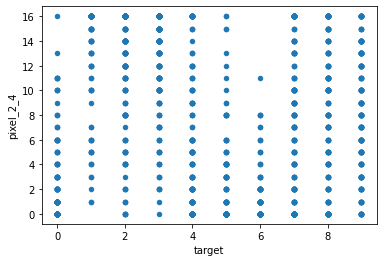

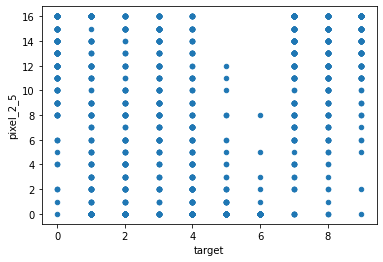

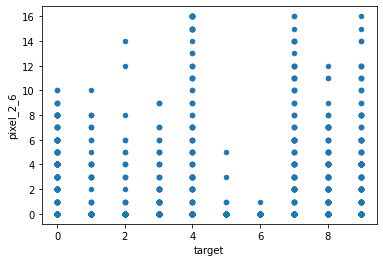

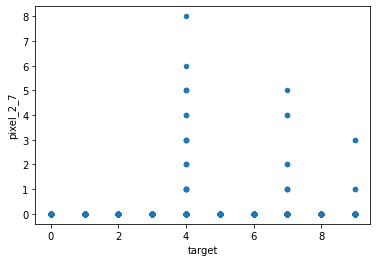

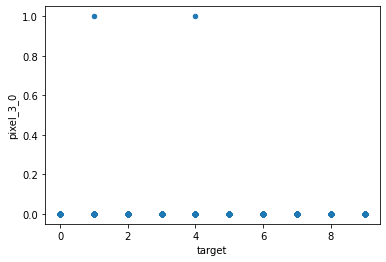

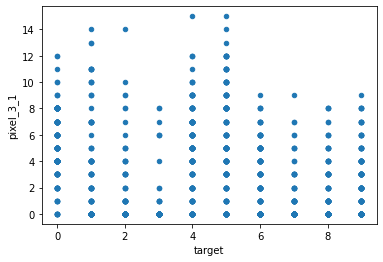

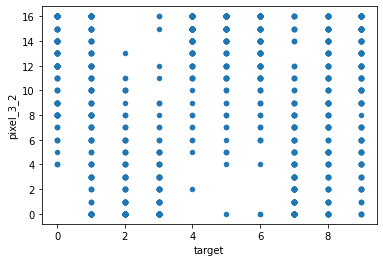

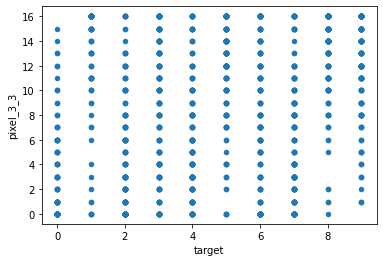

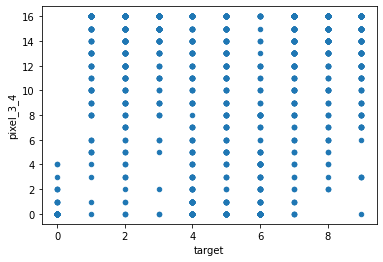

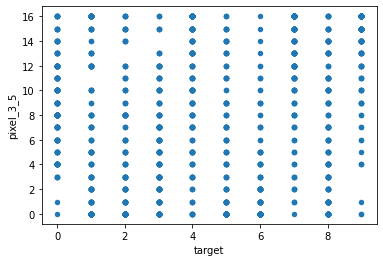

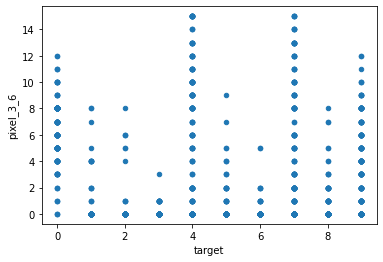

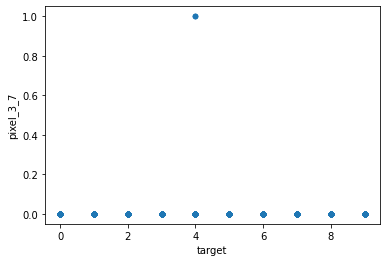

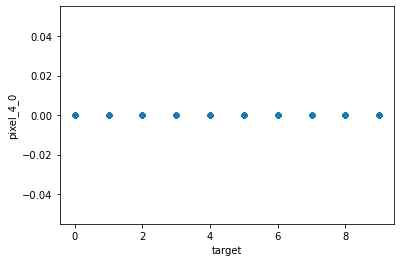

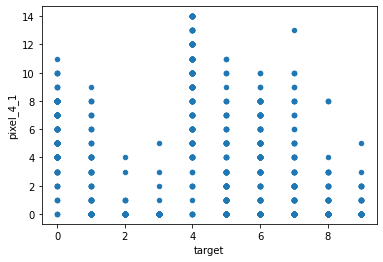

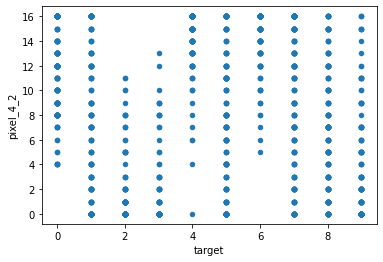

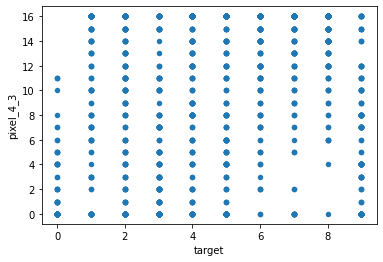

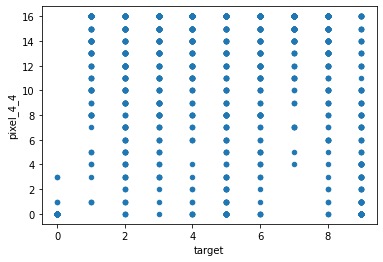

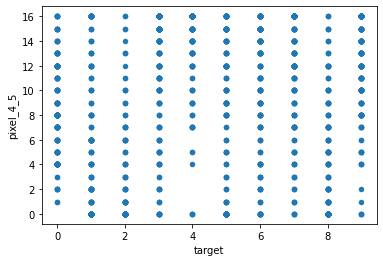

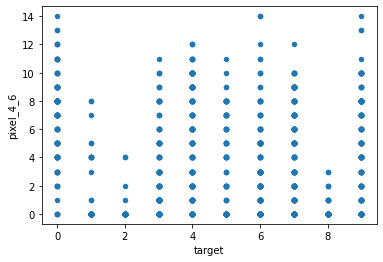

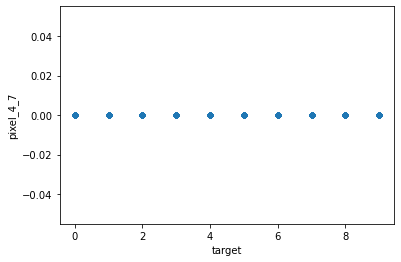

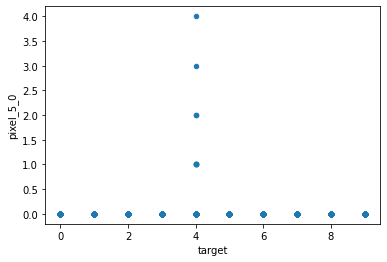

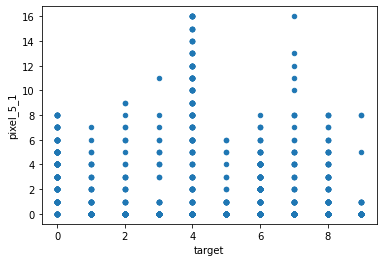

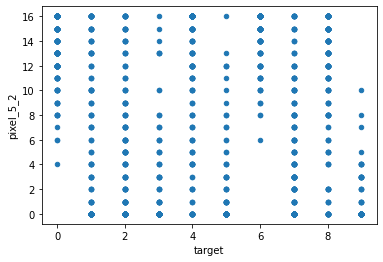

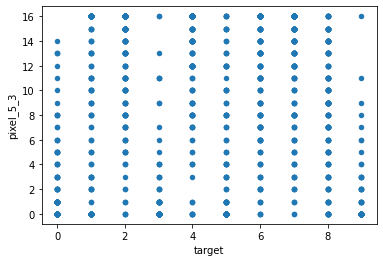

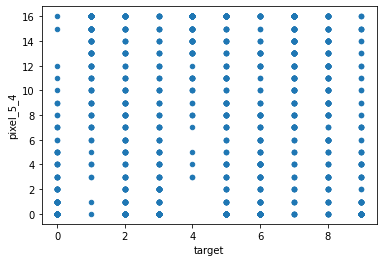

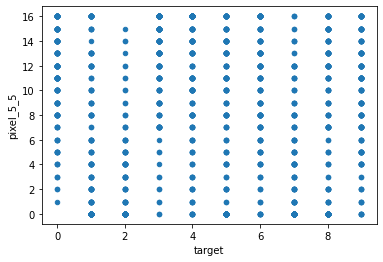

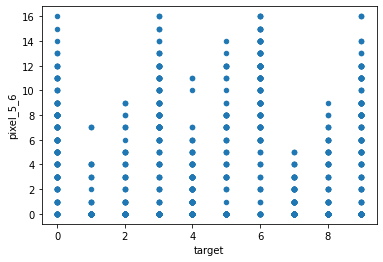

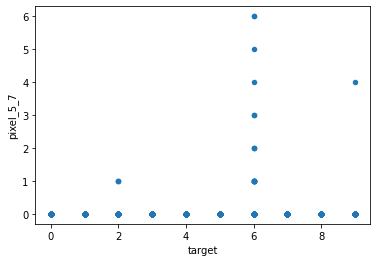

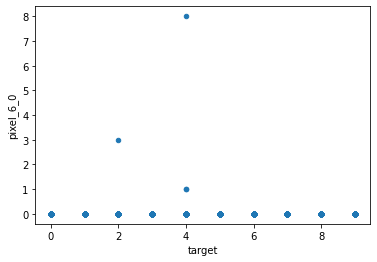

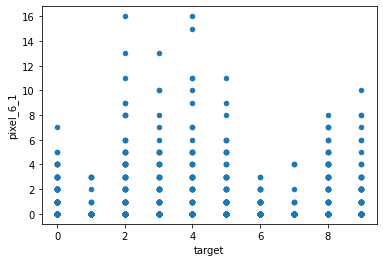

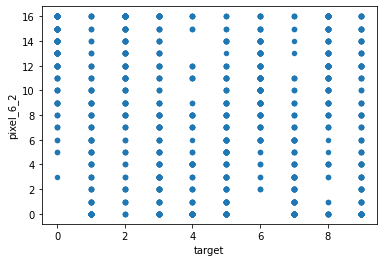

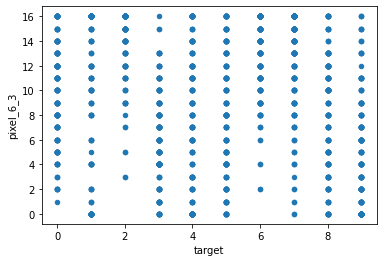

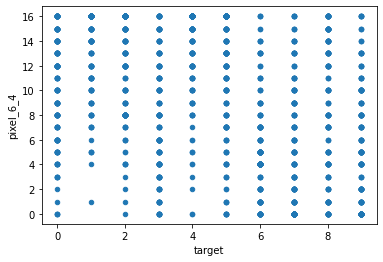

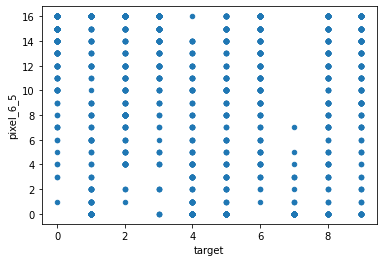

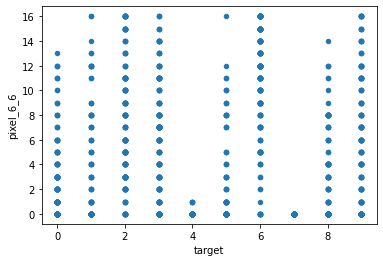

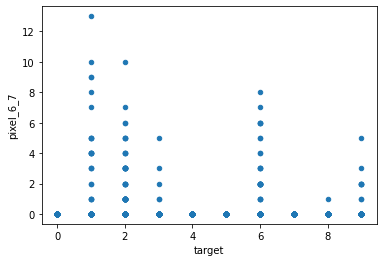

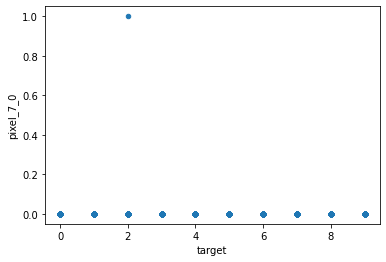

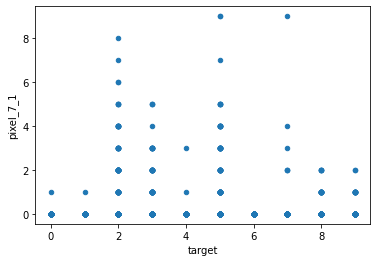

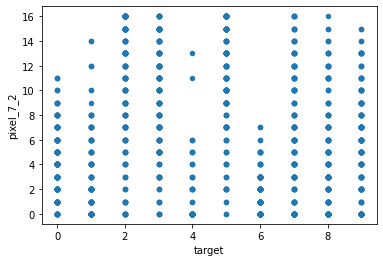

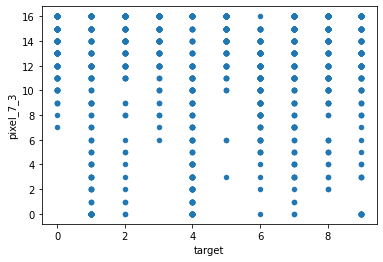

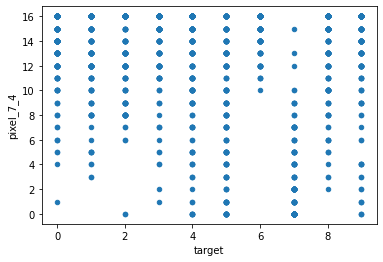

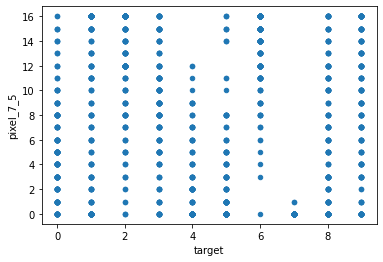

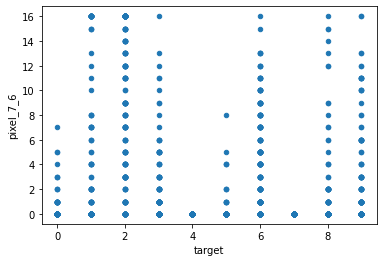

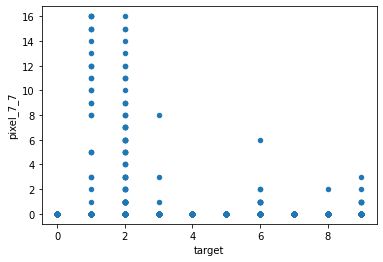

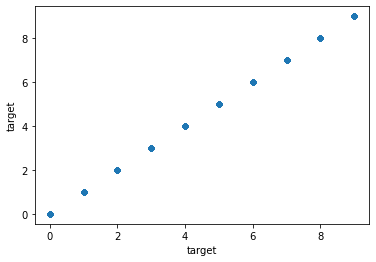

In [25]:
# 散布図を使い、外れ値を探す
# 【考察】：散布図からは、外れ値と明言できる値が見つからない
colname = df.columns
for name in colname:
  df.plot(kind ='scatter',x = 'target', y = name )

In [26]:
# describe関数で、最大値・最小値・平均値・中央値・四分位を表示する
df.describe()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,898.000000,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,518.893534,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,449.000000,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,898.000000,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,1347.000000,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,1796.000000,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [27]:
# corr関数で、相関係数マトリックスを表示する
df.corr()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
Unnamed: 0,1.000000,NaN,0.022699,0.070527,0.125980,0.013634,-0.027654,-0.045730,-0.037822,0.028972,...,0.008155,-0.018013,0.012596,0.060702,0.068492,-0.019908,-0.061310,-0.052969,0.007556,0.006715
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,0.022699,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,0.070527,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,0.125980,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,-0.019908,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
pixel_7_5,-0.061310,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
pixel_7_6,-0.052969,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
pixel_7_7,0.007556,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


### ◆欠損値の有無を確認する

In [28]:
# データフレームの全体の欠損値の有無を確認する
print('データフレーム全体の欠損値 = ',df.isnull().sum().sum())


データフレーム全体の欠損値 =  0


In [29]:
print('【考察】：欠損値がないため、欠損値処理不要と確認する')

【考察】：欠損値がないため、欠損値処理不要と確認する


### ◆特徴量を変数xに代入してデータフレームを作成する
#### 特徴量は、pixel_0_0 から pixel_7_7とする
#### 目的変数(正解データ)の「target」列と、先頭の「unnamed」列は除外する

In [30]:
# 特徴量の抽出
x = df.iloc[:,1:-1]
# 特徴量の先頭の3行を表示
x.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0


### ◆目的変数(正解データ)の「target」列を変数tに代入してデータフレームを作成する


In [31]:
# 目的変数(正解データ)の抽出
t = df.loc[:,'target']
# 目的変数(正解データ)の先頭の3行を表示
print(t.head(3))
# 目的変数(正解データ)のデータの個数を表示
print(t.value_counts())

print('【考察】：どれも同等の個数であり、不均衡データではない')


0    0
1    1
2    2
Name: target, dtype: int64
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64
【考察】：どれも同等の個数であり、不均衡データではない


### ◆モデルの準備と、学習の実行
#### 決定木モデルを準備して、学習を実行する
#### 決定木の深さは2とする


In [32]:
# モジュールのインポート
from sklearn import tree
# 決定木モデルの準備
# 【考察】：不均衡データではないため、class_weight = 'balance'は設定しない
model = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0,)


### ◆訓練データを8割、テストデータを2割に分割する


In [33]:
# train_test_split関数のインポート
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, t,test_size = 0.2, random_state = 0)

### ◆分割した訓練データ、テストデータの行数と列数を表示し
### 正しく分割されたか確認する


In [34]:
# 訓練データの行数と列数を表示
lx = x_train.shape
print('x_train:行数 = ',lx[0],'、','列数 = ',lx[1])
# テストデータの行数と列数を表示
ly = x_test.shape
print('x_test:行数 = ',ly[0],'、','列数 = ',ly[1])

print('訓練データとテストデータが、8:2の比率で分割されている')

x_train:行数 =  1437 、 列数 =  64
x_test:行数 =  360 、 列数 =  64
訓練データとテストデータが、8:2の比率で分割されている


### ◆訓練データで学習させて、正解率を計算し表示する

In [35]:
# 訓練データで学習
model.fit(x_train,y_train)
# テストデータを利用して正解率を計算し表示する
print('訓練データの正解率 = ',model.score(x_train,y_train))
print('テストデータの正解率 = ',model.score(x_test,y_test))

訓練データの正解率 =  0.3326374391092554
テストデータの正解率 =  0.2611111111111111


### ◆正解率を上げるための試行錯誤
####  階層の深さと、データの分割比率を変えることで、正解率を上げることができた

In [36]:
# 決定木モデルの準備
# 【考察】：階層の深さを10、random_stateを1(別のシード値)に設定する
model2 = tree.DecisionTreeClassifier(max_depth =12, random_state = 1)

# 訓練データとテストデータの分割比率を7:3に設定する
x2_train, x2_test, y2_train, y2_test = train_test_split(x, t,test_size = 0.3, random_state = 1)

# 訓練データで学習
model2.fit(x2_train,y2_train)
# テストデータを利用して正解率を計算し表示する
print('訓練データの正解率 = ', model2.score(x2_train,y2_train))
print('テストデータの正解率 = ', model2.score(x2_test,y2_test))

訓練データの正解率 =  0.9920445505171042
テストデータの正解率 =  0.8685185185185185


### 【考察】:十分に良いスコアを出すことができた。

### ◆モデルを保存する


In [37]:
import pickle

# モデルを保存
# 実装
with open('kouka_bunrui(tree)_digits.pkl', 'wb') as f:
  pickle.dump(model2, f)

### ◆新たな未知のデータによる正解率の算出
      乱数で作成しているため、良い正解率にはならない…チャレンジ結果としてご参考に。
      本来は画像データから算出したい。

In [38]:
# 新たな未知のデータを乱数で生成する
import pandas as pd
import numpy as np

# 正解データ(target)のデータを生成
np.random.seed(100)
new_t = np.random.randint(0,10,10)
new_t

array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])

In [39]:
# 0から16までの整数の値をとる、10行×65列のデータを生成する
np.random.seed(123)
new_columns = x.columns
new_x = pd.DataFrame(np.random.randint(0,16,(10,64)), columns = new_columns)
new_x.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,14,13,14,2,12,2,6,1,3,10,...,11,2,1,12,8,3,10,5,0,11
1,2,10,10,6,13,2,4,15,11,11,...,9,7,9,2,3,11,3,3,8,14
2,6,9,7,14,6,3,9,6,12,6,...,8,6,13,12,12,15,4,4,7,0
3,0,9,8,8,4,10,15,10,13,13,...,14,6,7,9,1,14,3,11,10,12
4,8,11,10,3,13,10,10,11,7,9,...,9,1,10,2,13,10,8,5,0,9


In [40]:
# 新たな未知のデータを利用して正解率を計算し表示する
print('新たな未知のデータの正解率 = ', model2.score(new_x,new_t))

# 残念ながら正解率は良くない。未知のデータをランダム関数で作成しているが
# 本来のデータセットの傾向がランダムで作成したデータセットでは再現できないことが原因。。


新たな未知のデータの正解率 =  0.1
